### Student Evaluation with Clustering Algorithm

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram as dend, linkage
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.cluster import AgglomerativeClustering
warnings.filterwarnings('ignore')
pd.options.display.max_columns= 99

In [25]:
data_ds = pd.read_csv('./turkiye-student-evaluation_generic.csv')

In [26]:
data_ds

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,3,13,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5816,3,13,1,3,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5
5817,3,13,1,0,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
5818,3,13,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [27]:
data_ds.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [28]:
data_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   instr       5820 non-null   int64
 1   class       5820 non-null   int64
 2   nb.repeat   5820 non-null   int64
 3   attendance  5820 non-null   int64
 4   difficulty  5820 non-null   int64
 5   Q1          5820 non-null   int64
 6   Q2          5820 non-null   int64
 7   Q3          5820 non-null   int64
 8   Q4          5820 non-null   int64
 9   Q5          5820 non-null   int64
 10  Q6          5820 non-null   int64
 11  Q7          5820 non-null   int64
 12  Q8          5820 non-null   int64
 13  Q9          5820 non-null   int64
 14  Q10         5820 non-null   int64
 15  Q11         5820 non-null   int64
 16  Q12         5820 non-null   int64
 17  Q13         5820 non-null   int64
 18  Q14         5820 non-null   int64
 19  Q15         5820 non-null   int64
 20  Q16         5820 non-null   in

In [29]:
data_ds.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [30]:
x_qeustions = data_ds.iloc[:, 5:33]
q_mean = x_qeustions.mean(axis=0)
total_mean = q_mean

In [31]:
q_mean = q_mean.to_frame('mean')
q_mean.reset_index(level=0, inplace=True)

In [32]:
q_mean

,index,mean
0,Q1,2.929897
1,Q2,3.073883
2,Q3,3.178694
3,Q4,3.082474
4,Q5,3.105842
5,Q6,3.107388
6,Q7,3.066323
7,Q8,3.041924
8,Q9,3.165979
9,Q10,3.090722


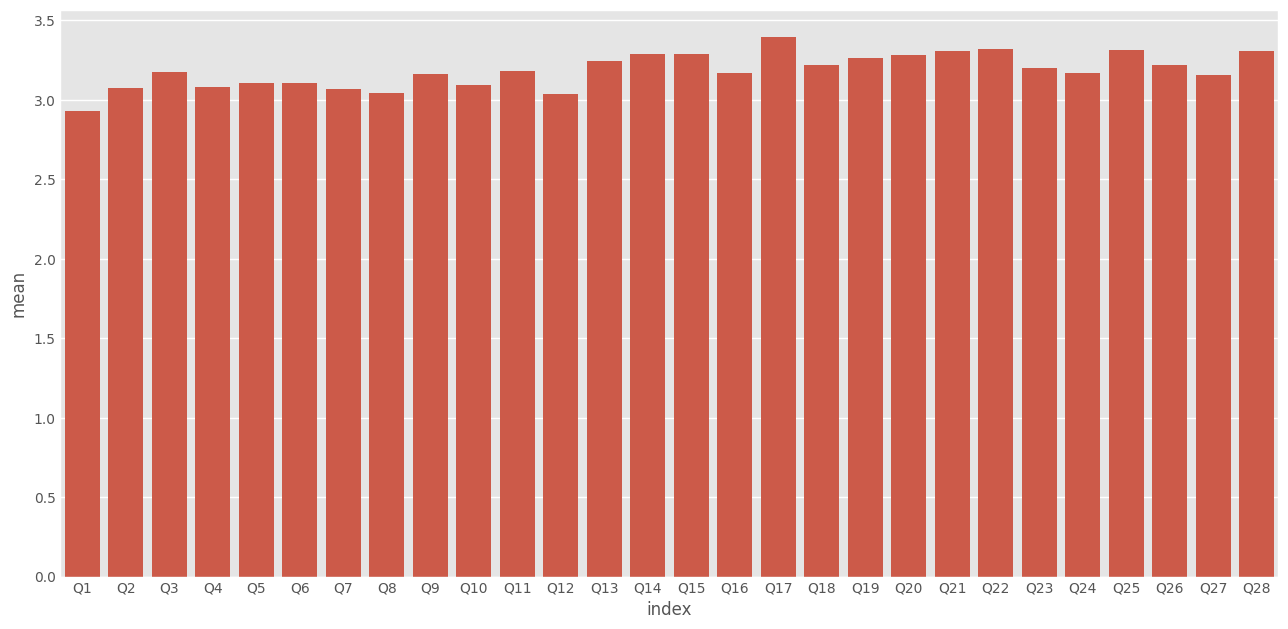

In [33]:
plt.style.use("ggplot")
plt.figure(figsize=(14, 7))
sns.barplot(x='index', y='mean', data=q_mean)
plt.show();

<Axes: >

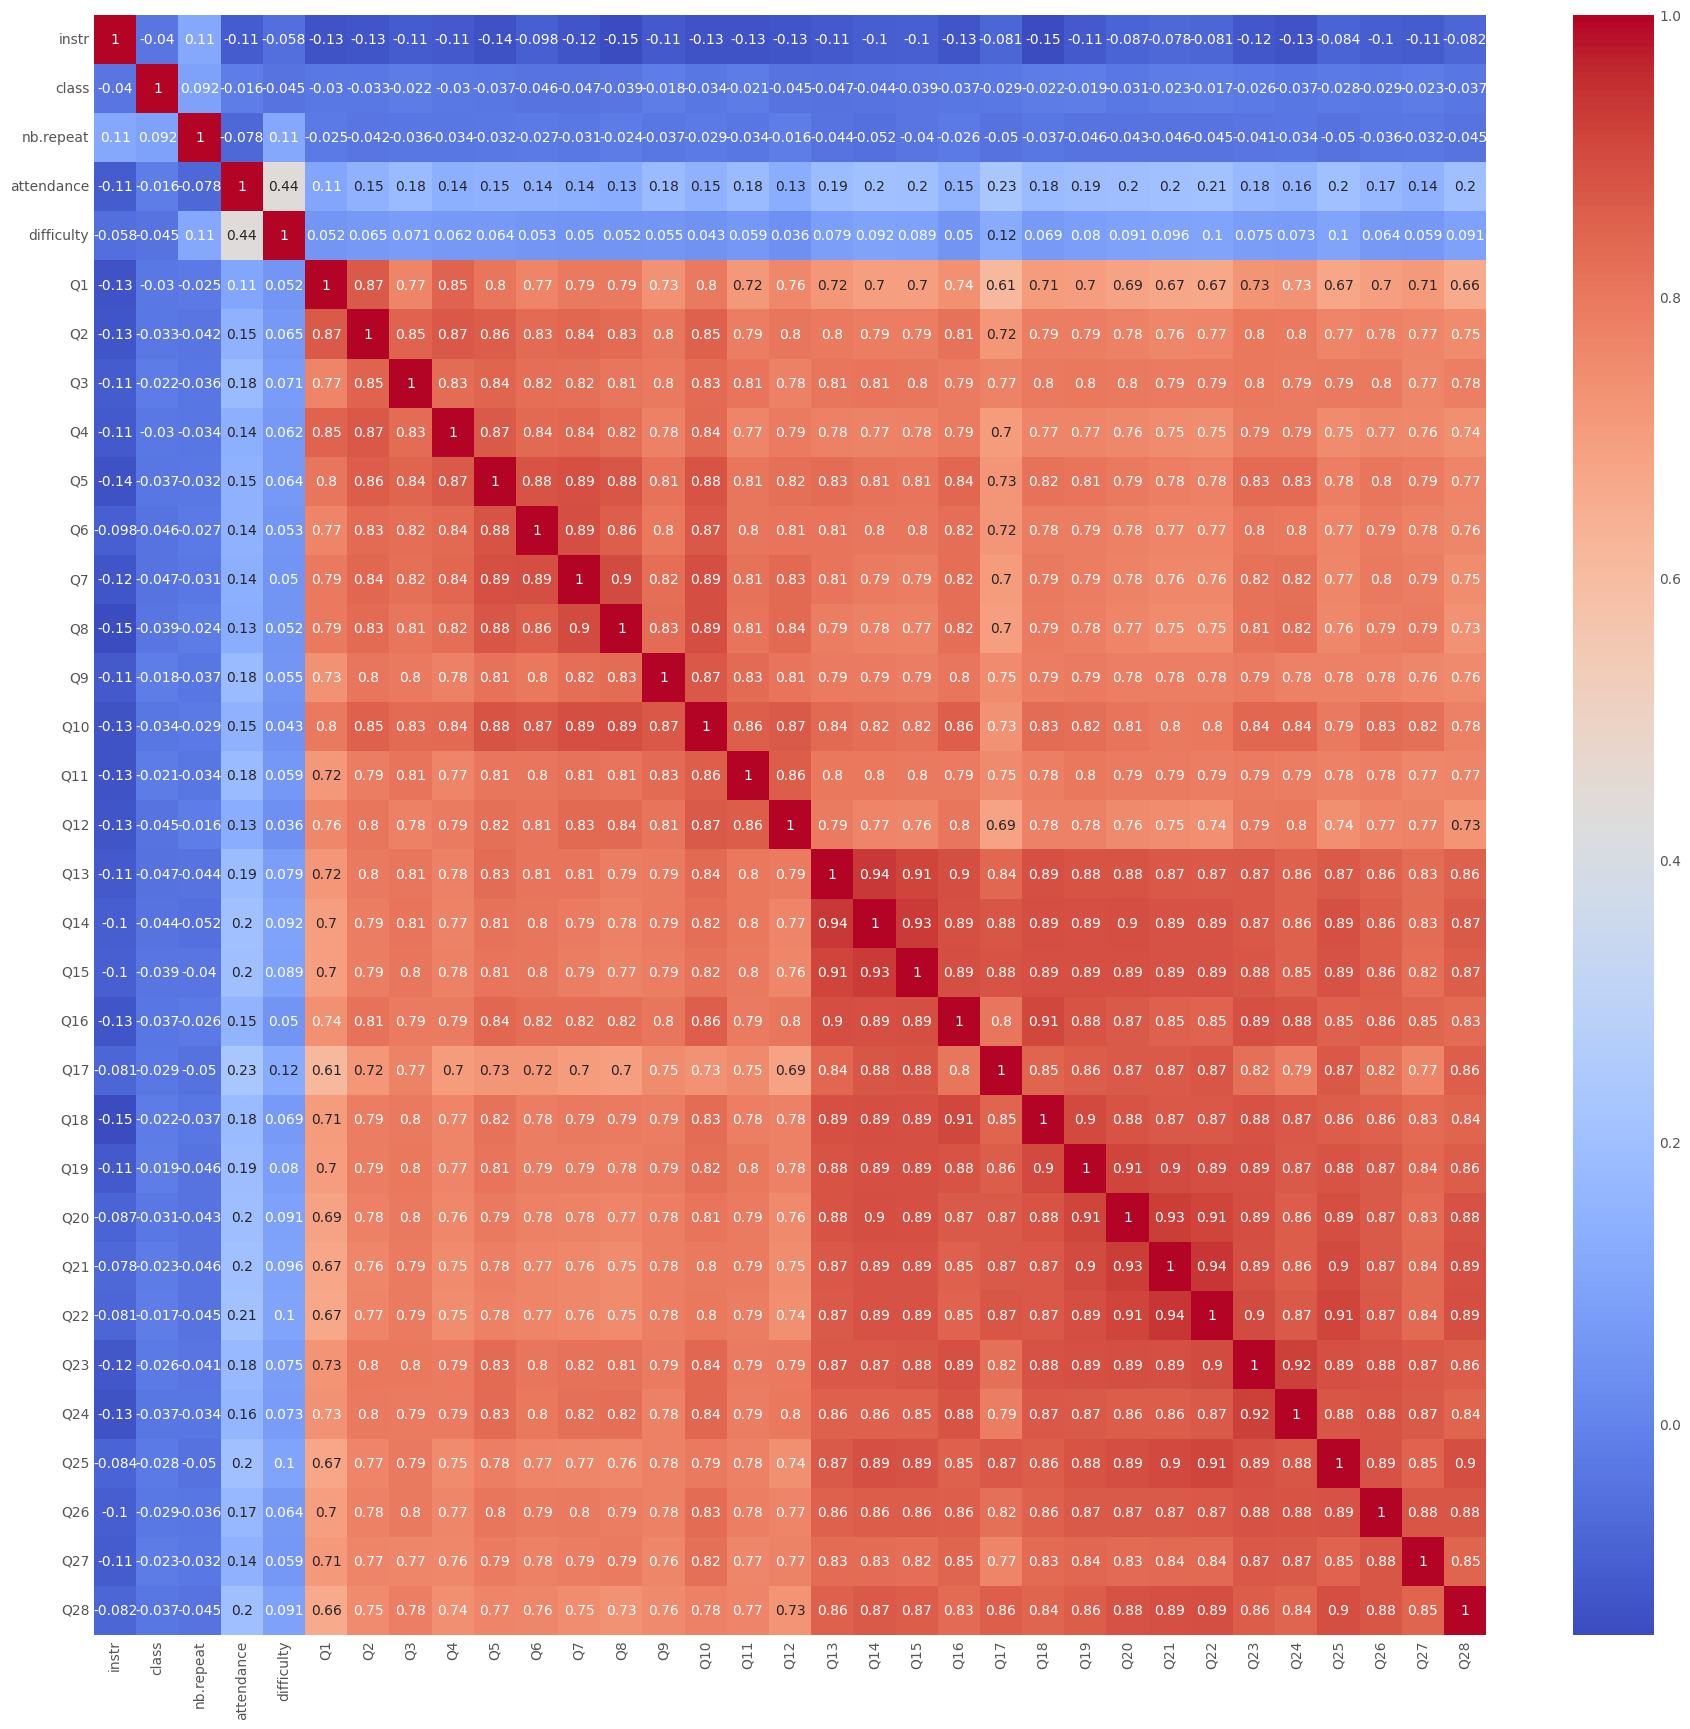

In [37]:
corr = data_ds.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [38]:
X = data_ds.iloc[:, 5:33]

In [42]:
# reduce the dimssions of attributes of data 
X = data_ds.iloc[:, 5:33] 
pac = PCA(n_components=2, random_state=42) 
X_pca = pac.fit_transform(X) # reduce the Questions (Q1 to Q28) to only 2 attributes (n_components = 2)
pac.explained_variance_ratio_.cumsum()[1] # amount of info after PCA

0.8671381678891028

In [44]:
n_clusters = []
cluster_range = range(1, 6)

for i in cluster_range:
    model = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model.fit(X=X_pca)
    n_clusters.append(model.inertia_)

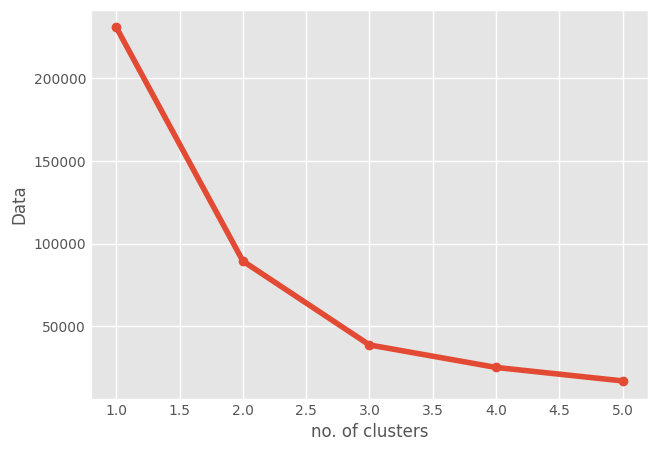

In [45]:
plt.plot(cluster_range, n_clusters, marker='o')
plt.xlabel('no. of clusters')
plt.ylabel('Data')
plt.show()

In [47]:
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(X=X_pca)
y = model.predict(X=X_pca)

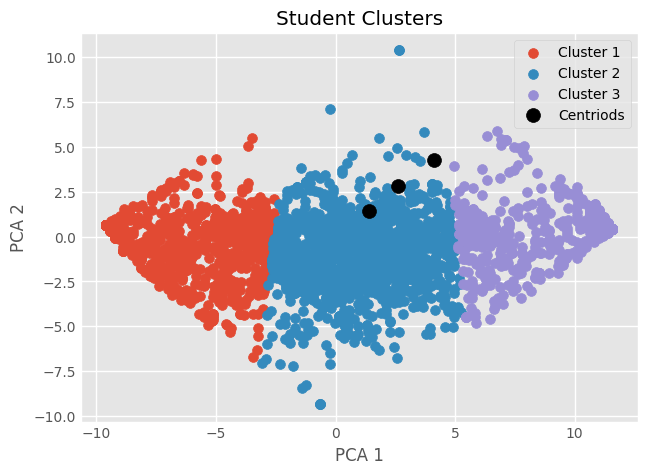

In [55]:
plt.style.use('ggplot')
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50,  label='Cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50,  label='Cluster 2')
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], s=50,  label='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, color='black', label='Centriods')
plt.title('Student Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show;

In [53]:
Counter(y)

Counter({0: 2358, 2: 2222, 1: 1240})

In [54]:
# try with origial data with PCA

model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(X)
y = model.predict(X)
Counter(y)

Counter({1: 2358, 0: 2223, 2: 1239})

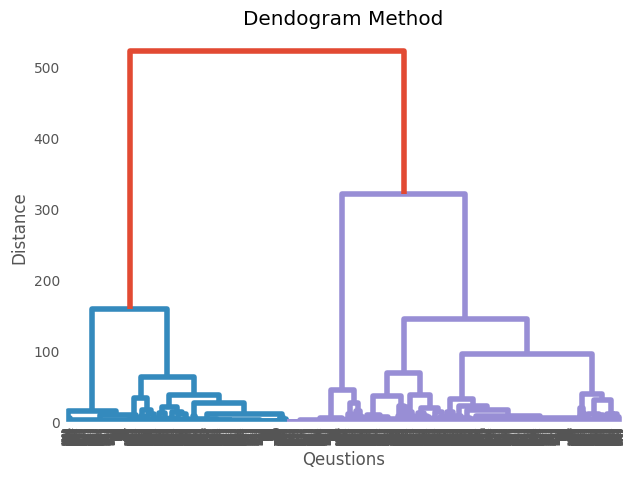

In [65]:
# using dendogram method to determine number of clusters

den = dend(linkage(X_pca, method='ward'))
plt.title('Dendogram Method')
plt.xlabel('Qeustions')
plt.ylabel('Distance')
plt.show();

In [67]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y =model.fit_predict(X=X_pca)

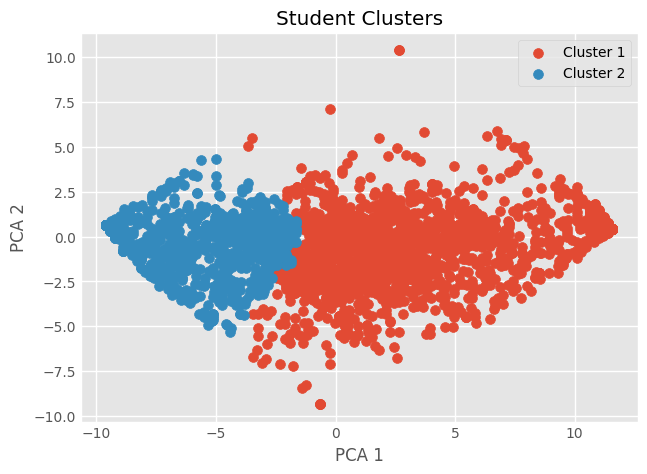

In [68]:
plt.style.use('ggplot')
plt.scatter(X_pca[y==0, 0], X_pca[y==0, 1], s=50,  label='Cluster 1')
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], s=50,  label='Cluster 2')
plt.title('Student Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show;

In [69]:
Counter(y)

Counter({0: 3502, 1: 2318})